We start by importing a number of useful Python libraries to help us process and visualise the Seattle Weather dataset.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV input/output
import matplotlib.pyplot as plt # plotting graphs
import seaborn as sns # statistical graphics

We import the dataset (which is saved in the same folder as the Jupyter notebook) in a CSV format and store it in the variable "dataset" by using the read_csv function in the "pandas" library. By using the .head() function, we can view the first 5 rows of the dataset to ensure that it has been loaded correctly and to get an idea of the information that this dataset contains.

In [2]:
dataset = pd.read_csv('weather-dataset.csv')
dataset.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


We then can use the .describe() function in order to get some basic statistical information on the dataset, such as the number of data points, the mean, the standard deviation, etc. 

In [3]:
dataset.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


We then use the .info() function to know which data type each column contains, and to know if there any null entries in any of the columns.

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


We can use the .heatmap() function in the seaborn library in order to produce a heatmap showing the correlation between the data in each of the columns (with 0 showing no correlation, 1 showing perfect positive correlation, -1 showing perfect negative correlation).

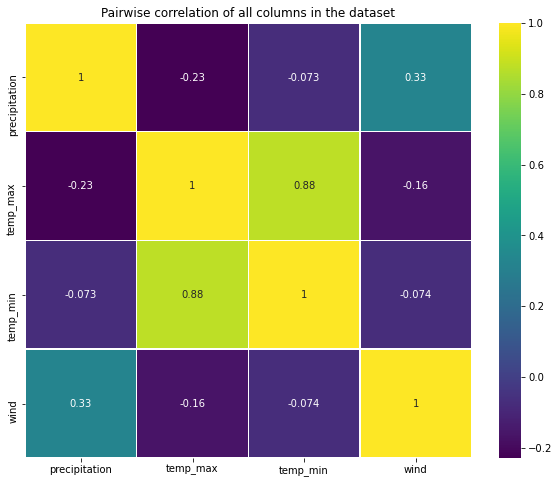

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(data = dataset.corr(), annot=True, linewidths = 0.5, cmap = "viridis")
plt.title("Pairwise correlation of all columns in the dataset")
plt.savefig('plot.png', dpi=300, bbox_inches='tight')
plt.show()

The positive correlation between the maximum and minimum temperature is more clearly evidenced through the line graph below.  

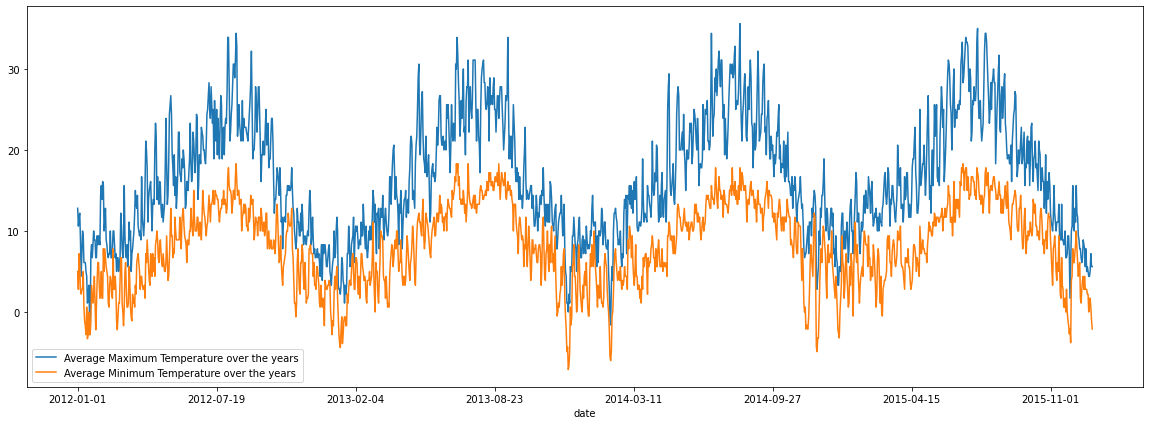

In [6]:
plt.figure(figsize=(20, 7))
dataset.groupby('date')['temp_max'].mean().plot(label='Average Maximum Temperature over the years')
dataset.groupby('date')['temp_min'].mean().plot(label='Average Minimum Temperature over the years')
plt.legend(loc='best')
plt.show()

We can create boxplots in order to visualise the spread of the data.

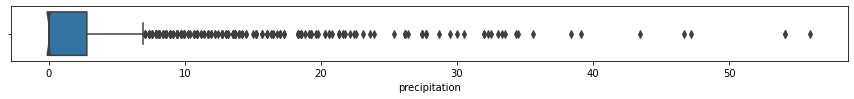

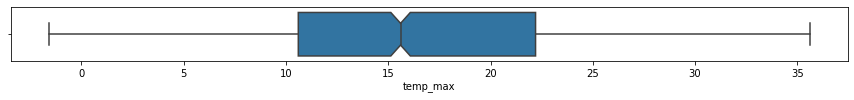

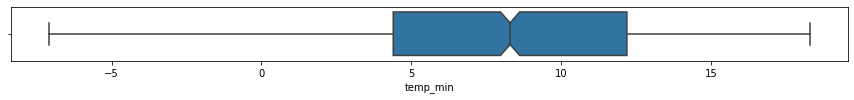

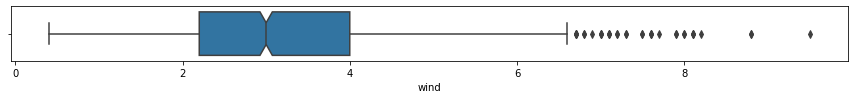

In [7]:
plt.figure(figsize=(15,1))
sns.boxplot(x=dataset["precipitation"], notch = True)
plt.show()
plt.figure(figsize=(15,1))
sns.boxplot(x=dataset["temp_max"], notch = True)
plt.show()
plt.figure(figsize=(15,1))
sns.boxplot(x=dataset["temp_min"], notch = True)
plt.show()
plt.figure(figsize=(15,1))
sns.boxplot(x=dataset["wind"], notch = True)
plt.show()

Through finding the mean of the maximum and minimum temperature arrays, we can create an array with the average temperature for each day, and with some data formatting, we can use this to produce a line graph showing the average temperature of any given day over time.

In [8]:
dataset['temp_avg'] = (dataset['temp_max'] + dataset['temp_min'])/2

dataset['date'] = pd.to_datetime(dataset['date'])
dataset['dayofyear'] = dataset['date'].dt.dayofyear

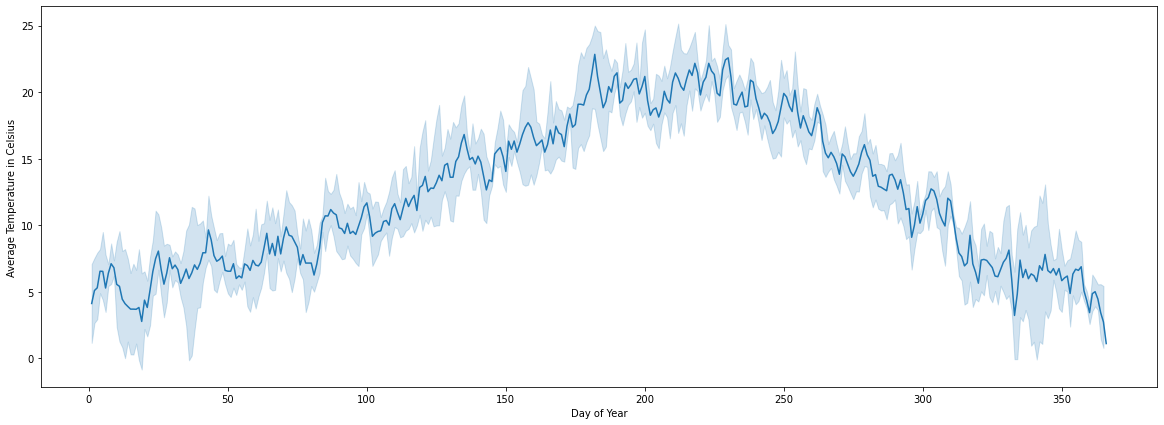

In [9]:
plt.figure(figsize=(20, 7))
l = sns.lineplot(data=dataset, x='dayofyear', y='temp_avg')
l.set_xlabel("Day of Year")
l.set_ylabel("Average Temperature in Celsius")
plt.show()